# Drugs Revenue Analysis
By Juan Sirai

<img src="https://www.directivepublications.org/images/background/pharma.jpg">

## Objective

In the first project we propose you to perform an analysis of the sales of drugs sold in the United States. Here you can find the dataset we will have to analyze. To do this we will ask you a series of questions that we want you to answer by analyzing the data.

### 1. Clean and understand the dataset
Before proceeding to answer the questions, it is very important to clean the data in order to achieve more robust analyses.<br>
Therefore, we ask you to clean the data in addition to answering the following questions:

* Which are the columns in which we have NaN's values? What is the meaning of the NaN's and why is important to delete these rows?
* Can you find a value that we can consider NaN even if it is not explicitly specified? If so, should we delete its records or keep them?
* How many records, rows, do you have left after cleaning?
* What's the meaning of NDC and why it's important to know the size of the packages?

### 2. Data insights
Now it's our turn to be able to make our first insights as data analysts! For this we ask you to perform a function that can generate the following charts:

* To know the Macro economic context at the US level, we will need to visualize for each product the total reimbursed for each semester.
* On a smaller scale, instead of doing exercise 2 at the U.S. level, we ask you to do it for each state.
* What's the product code that has more frequency in USA? What's the meaning of this code and in 10 years do you think it will still be at the top?

-------------------------------------------------------------------

## Some context and definitions


Many pharmaceutical companies, state programs and nonprofits have drug assistance programs (PAPs) that offer free or low-cost medicines if you don’t have insurance or are underinsured and can’t afford your medicine.

Programs and program benefits vary. Depending on your insurance and medicine, you may be eligible for help to reduce their medicine copay. You may qualify for free medicines if you do not have health insurance, do not have enough health insurance to cover your medicines or meet certain criteria.

## About the dataset

State Drug Utilization Data (SDUD) has been reported by states since the start of the Medicaid Drug Rebate Program for covered outpatient drugs paid for by state Medicaid agencies.

The Medicaid Drug Rebate Program (MDRP) is a program that includes Centers for Medicare & Medicaid Services (CMS), state Medicaid agencies, and participating drug manufacturers that helps to offset the Federal and state costs of most outpatient prescription drugs dispensed to Medicaid patients. Approximately 780 drug manufacturers currently participate in this program. All fifty states and the District of Columbia cover prescription drugs under the MDRP, which is authorized by Section 1927 of the Social Security Act.

The program requires a drug manufacturer to enter into, and have in effect, a National Drug Rebate Agreement (NDRA) with the Secretary of the Department of Health and Human Services (HHS) in exchange for state Medicaid coverage of most of the manufacturer’s drugs. When a manufacturer markets a new covered outpatient drug (COD), it must also submit product and pricing data concerning the drug to CMS via the Medicaid Drug Programs (MDP) system. This ensures that states are aware of the newly marketed drug. In addition, Section II(g) of the NDRA explains that manufacturers are responsible for notifying states of a new drug’s coverage. Manufacturers are required to report all CODs under their labeler code to the MDRP. Manufacturers may not be selective in reporting their National Drug Code's (NDC) to the program. Manufacturers are then responsible for paying a rebate on those drugs for which payment was made under the state plan. These rebates are paid by drug manufacturers on a quarterly basis to states and are shared between the states and the Federal government to offset the overall cost of prescription drugs under the Medicaid Program.

"Units Reimbursed" are the number of units (based on Unit Type) of the drug (11-digit NDC level) reimbursed by the state or, for MCO drugs, the number of units dispensed during the Quarter/Year. For more specific information, you may contact either the Drug Manufacturer or State via the contact lists.

-----------------------------------------------------------------

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

## 💊 1- Data Cleaning

In [3]:
df = pd.read_csv('data/DrugUtilization2021_revisedsep2022.csv')

#### A- Which are the columns in which we have NaN's values? What is the meaning of the NaN's and why is important to delete these rows?

Text(0.5, 1.0, 'Null values as percentage of total')

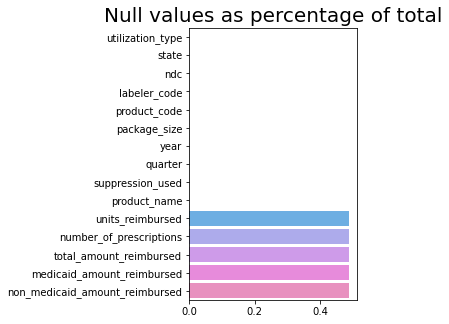

In [15]:
plt.figure(figsize=(3,5))
sns.barplot(y = df.columns, x = df.isnull().sum() / df.shape[0])
plt.title('Null values as percentage of total', size=20)

The columns with NAN values, are the ones related with the reimbursment. The meaning is: "We did not register a reimbursment for that specific product, in that particular combination of quarter, state and utilization type"

It's important to delete that records, since are not meaningful for our analysis: we are analyzing the utilization of drugs, and those rows are related with drugs which were not used.

#### B- Can you find a value that we can consider NaN even if it is not explicitly specified? If so, should we delete its records or keep them?

Yes, we also have products with name as a sequence of spaces '     '.<br>
Since the space is, in fact, an ascii character, they are not explicit blanks.

In those cases, is not necesary to delete them, since we can track the utilization of drugs by following the NDC code, which will be a more accurate field to identify each product in an unique way.

In [27]:
df.loc[df.product_name.str.contains('^ ')]

,utilization_type,state,ndc,labeler_code,product_code,package_size,year,quarter,suppression_used,product_name,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed
1031204,MCOU,HI,46122060705,46122,607,5,2021,3,True,,NaN,NaN,NaN,NaN,NaN
1042490,MCOU,HI,46122060705,46122,607,5,2021,2,True,,NaN,NaN,NaN,NaN,NaN
1053876,MCOU,HI,46122060705,46122,607,5,2021,1,True,,NaN,NaN,NaN,NaN,NaN
1279467,MCOU,IL,50228045290,50228,452,90,2021,2,False,,1140.0,34.0,358.89,358.89,0.0
1289603,MCOU,IL,68180090273,68180,902,73,2021,2,False,,2744.0,67.0,1299.91,1299.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304917,FFSU,NM,24201010224,24201,102,24,2021,2,True,,NaN,NaN,NaN,NaN,NaN
3309472,FFSU,NM,55513007104,55513,71,4,2021,2,True,,NaN,NaN,NaN,NaN,NaN
3318674,MCOU,NM,93065800,93,658,0,2021,1,True,,NaN,NaN,NaN,NaN,NaN
3321627,FFSU,NM,469625018,469,6250,18,2021,1,True,,NaN,NaN,NaN,NaN,NaN


In [28]:
print(f"Total cases of blank name of products : {df.loc[df.product_name.str.contains('^ ')].shape[0]}")

Total cases of blank name of products : 12429


#### How many records, rows, do you have left after cleaning?


In [34]:
df_cleaned = df.dropna()
print(f"Rows of original dataset: {df.shape[0]}\nRows of cleaned dataset {df_cleaned.shape[0]}\nReduction of rows: {round((df_cleaned.shape[0] - df.shape[0]) / df.shape[0],2)*100 }%")

Rows of original dataset: 4997243
Rows of cleaned dataset 2563576
Reduction of rows: -49.0%


#### What's the meaning of NDC and why it's important to know the size of the packages

Each listed drug product listed is assigned a unique 10-digit, 3-segment number.  This number, known as the NDC, identifies the labeler, product, and trade package size.  The first segment, the labeler code, is assigned by the FDA.  A labeler is any firm that manufactures (including repackers or relabelers), or distributes (under its own name) the drug. The second segment, the product code, identifies a specific strength, dosage form, and formulation for a particular firm. The third segment, the package code, identifies package sizes and types. Both the product and package codes are assigned by the firm. The NDC will be in one of the following configurations: 4-4-2, 5-3-2, or 5-4-1.

Talking about the third part of the NDC, <b>the package</b>, it's important to know its sice because different package sizes for the same pharma, will represents differences at the total volume/units distributed.

----------------------------------------------

## Data Insights

#### 1- Visualize for each product the total reimbursed for each semester.

In [ ]:
def graph_product(product_name):
    

In [50]:
print(f"Since we have {len(df_cleaned.product_code.unique())} different products, we cannot visualize all of it in the same graph.For that reason,\nwe defined a function which takes one product code as parameter, and then makes an specific visual for it")

Since we have 5285 different products, we cannot visualize all of it in the same graph.For that reason,
we defined a function which takes one product code as parameter, and then makes an specific visual for it


In [60]:
df_grouped_all = df_cleaned.groupby('quarter')['total_amount_reimbursed'].sum()
df_grouped_product = df_cleaned.loc[df_cleaned.product_code == 607].groupby('quarter')['total_amount_reimbursed'].sum()
print(df_grouped)
print(df_grouped_product)

quarter
1    4.050101e+10
2    4.159251e+10
3    4.247286e+10
4    4.302536e+10
Name: total_amount_reimbursed, dtype: float64
quarter
1    1.022020e+08
2    1.050167e+08
3    1.060285e+08
4    1.039075e+08
Name: total_amount_reimbursed, dtype: float64


In [73]:
df_grouped_product = df_cleaned.pivot_table(index=['quarter','product_code'],values = 'total_amount_reimbursed', aggfunc=sum).reset_index()

In [82]:
display(df_grouped_product.sort_values(['quarter','total_amount_reimbursed'], ascending=[True, False]))

,quarter,product_code,total_amount_reimbursed
554,1,554,1.167438e+09
1946,1,2501,1.083439e+09
100,1,100,5.538200e+08
1831,1,2219,4.626497e+08
331,1,331,4.548157e+08
...,...,...,...
18010,4,4826,0.000000e+00
19184,4,7339,0.000000e+00
19459,4,8455,0.000000e+00
19492,4,8726,0.000000e+00
